In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import fetch_data
import numpy as np

import importlib
importlib.reload(fetch_data)

start_date_str = '2023-05-30'
end_date_str = '2023-06-01'
organization_id = 'hamid'
can_k3y_id = '9ed5b50e'
imu_k3y_id = '78f8031e'

Collect IMU and CAN Server Data

In [3]:
event_dict = fetch_data.get_events(can_k3y_id, organization_id, start_date_str, end_date_str)
can_df = fetch_data.get_can_data(can_k3y_id, organization_id, start_date_str, end_date_str)
imu_df = fetch_data.get_imu_data(imu_k3y_id, organization_id, start_date_str, end_date_str)

CAN time is 1685492268.456939
IMU raw time is 1685492231.9824843
Delta is 36.47445464134216


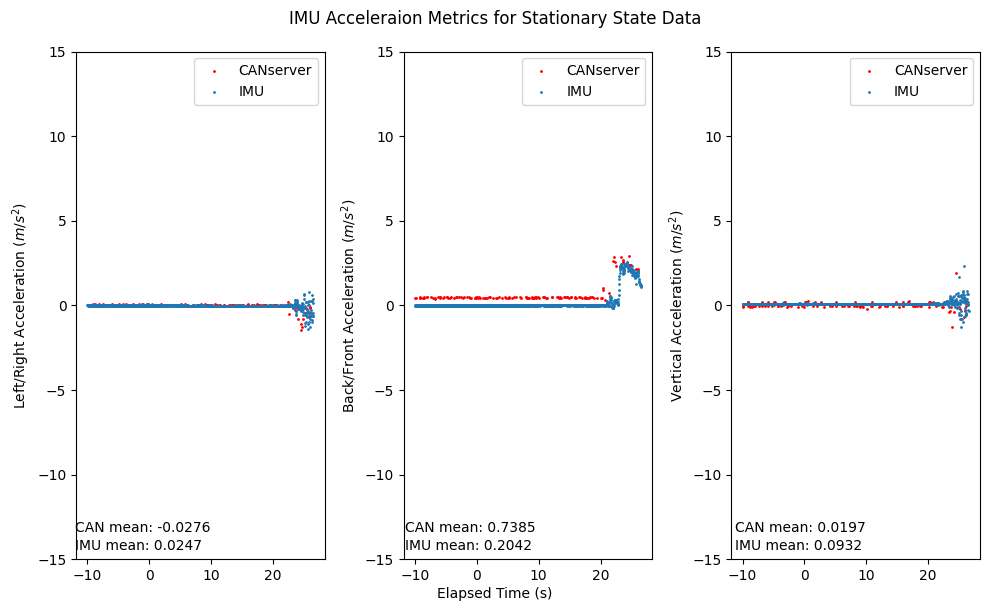

CAN time is 1685492385.688017
IMU raw time is 1685492349.0624576
Delta is 36.62555932998657


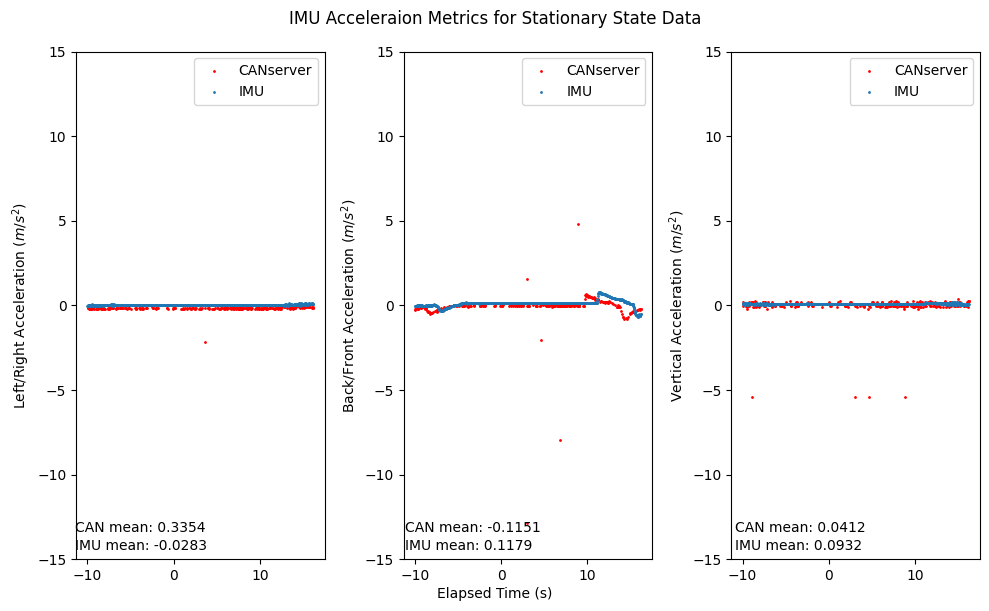

CAN time is 1685492427.793592
IMU raw time is 1685492391.107384
Delta is 36.68620800971985


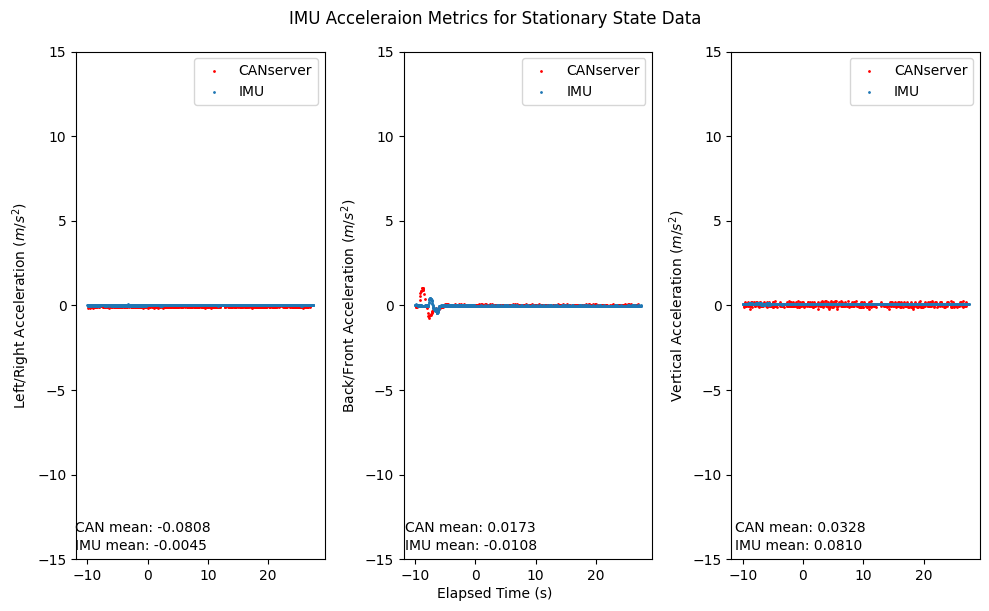

CAN time is 1685544342.468757
IMU raw time is 1685544340.057392
Delta is 2.411365032196045


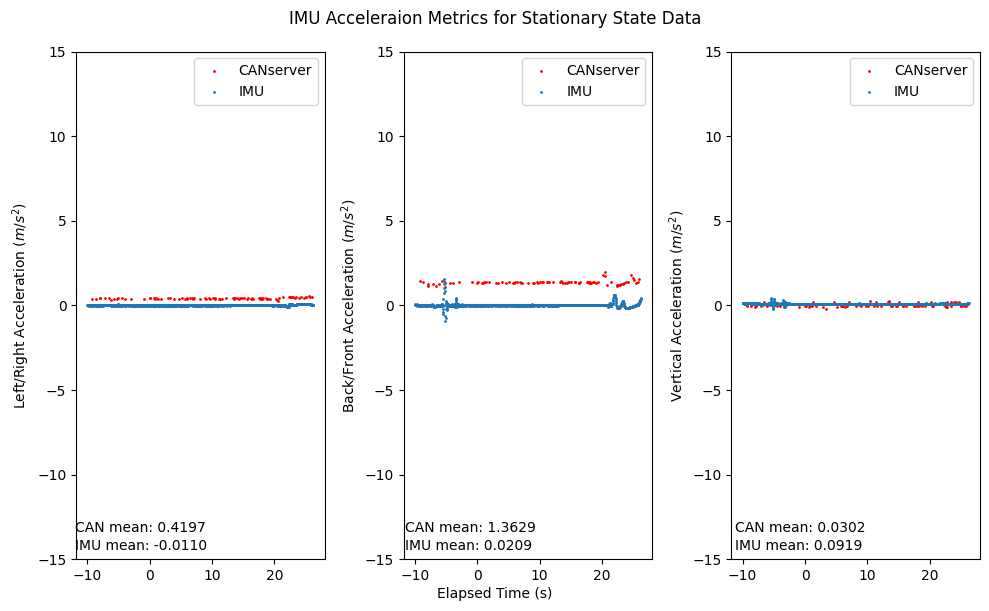

CAN time is 1685551061.578391
IMU raw time is 1685551049.6020703
Delta is 11.976320743560791


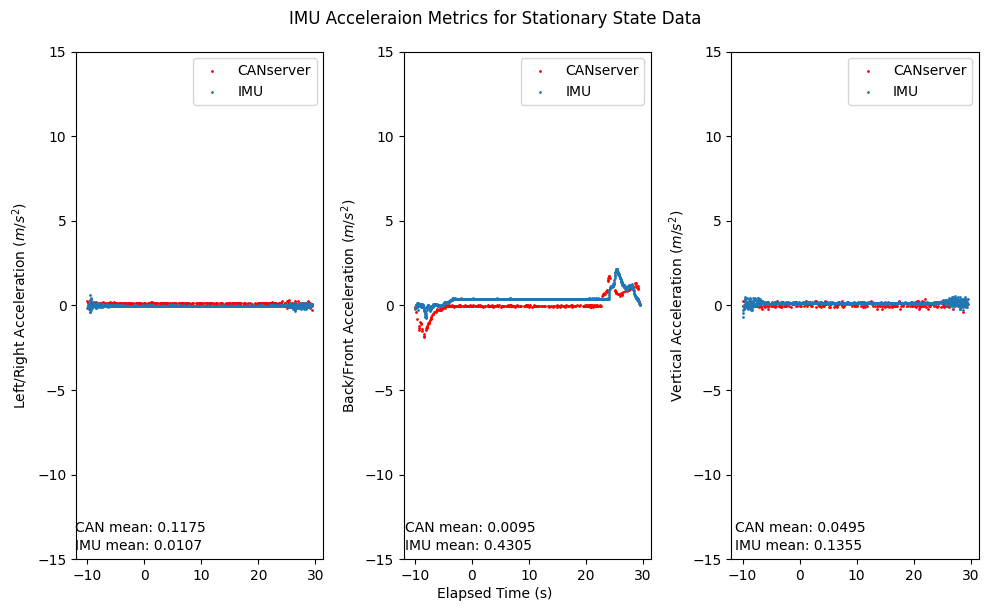

CAN time is 1685551211.92355
IMU raw time is 1685551199.705454
Delta is 12.218095779418945


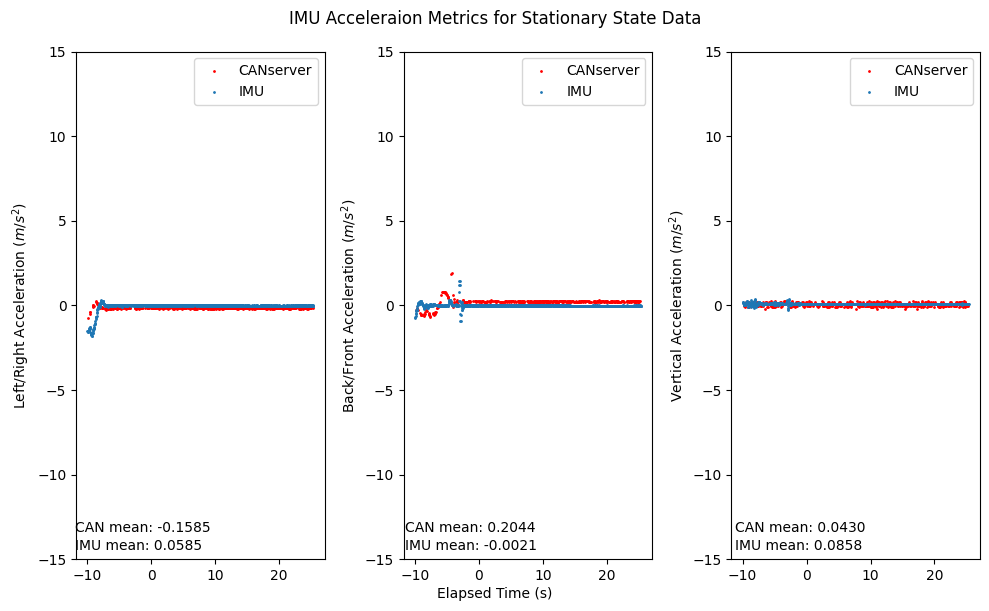

CAN time is 1685551241.260661
IMU raw time is 1685551229.0004146
Delta is 12.260246276855469


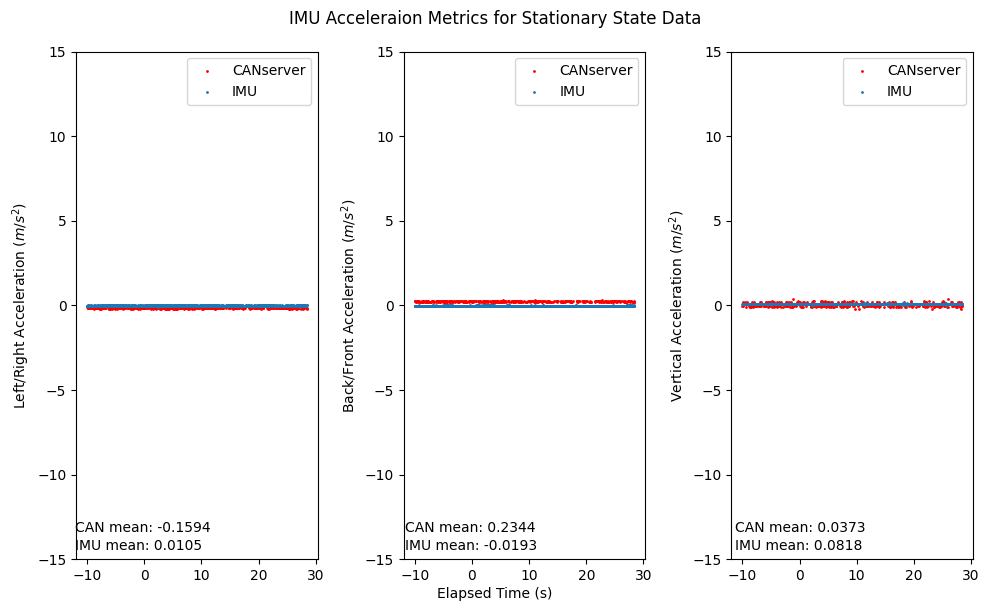

CAN time is 1685551265.999661
IMU raw time is 1685551253.6015236
Delta is 12.398137331008911


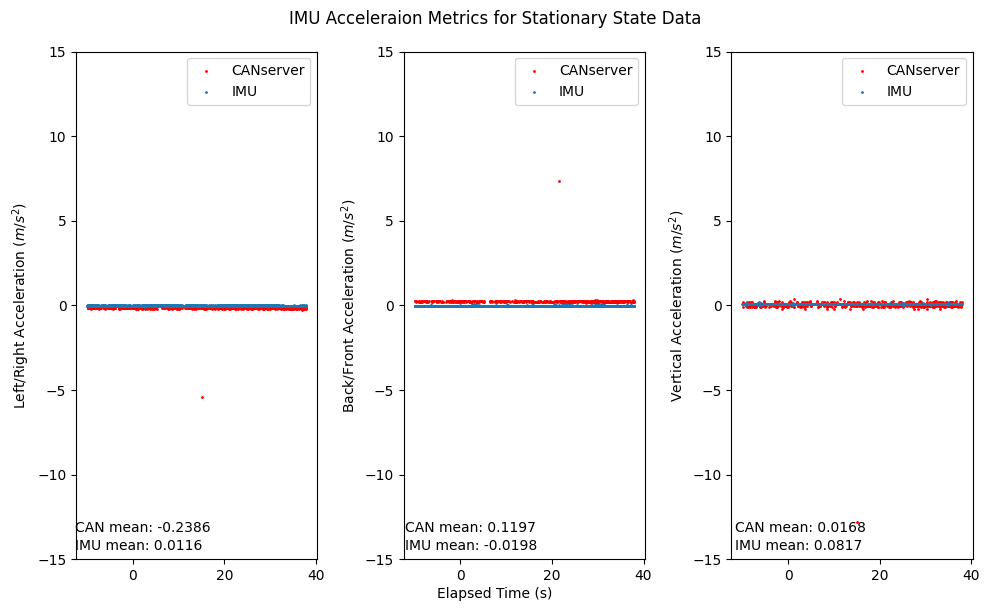

CAN time is 1685581087.212273
IMU raw time is 1685581084.4834235
Delta is 2.728849411010742


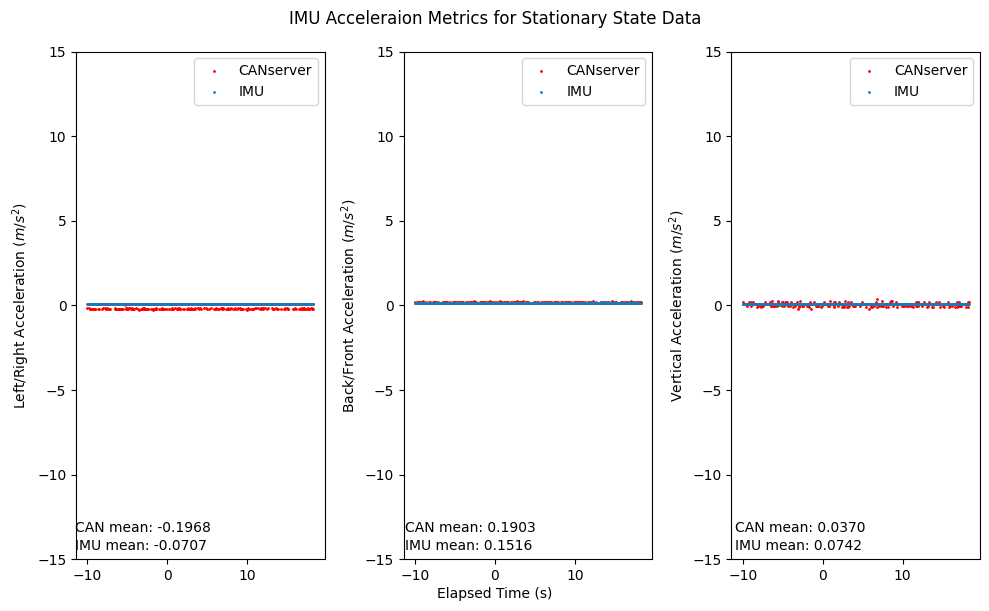

CAN time is 1685581322.142952
IMU raw time is 1685581319.3424544
Delta is 2.800497531890869


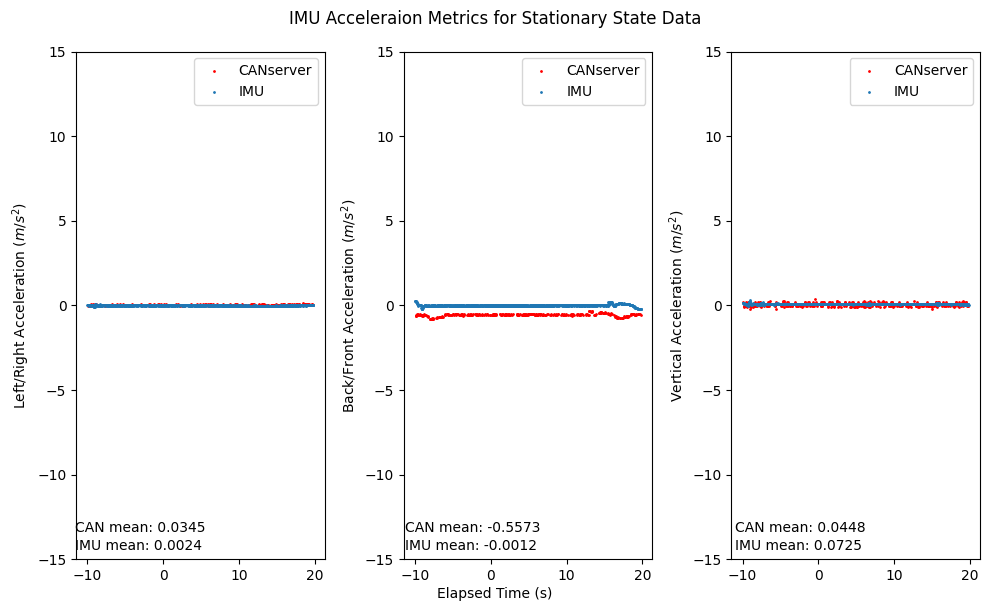

CAN time is 1685582322.891888
IMU raw time is 1685582319.9650989
Delta is 2.9267890453338623


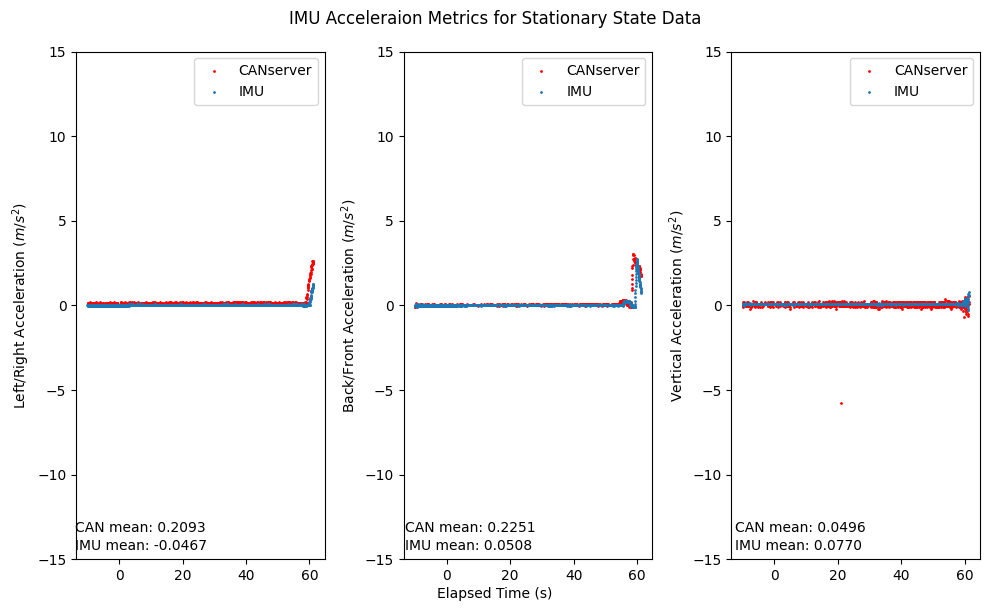

CAN time is 1685582338.200798
IMU raw time is 1685582335.344953
Delta is 2.8558449745178223


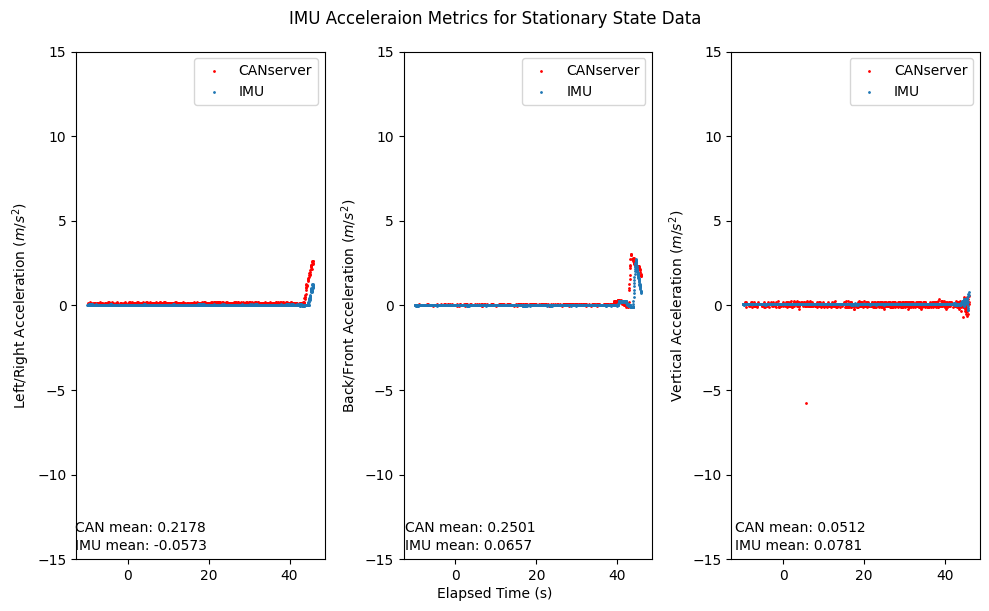

CAN time is 1685582907.848436
IMU raw time is 1685582904.9321992
Delta is 2.9162368774414062


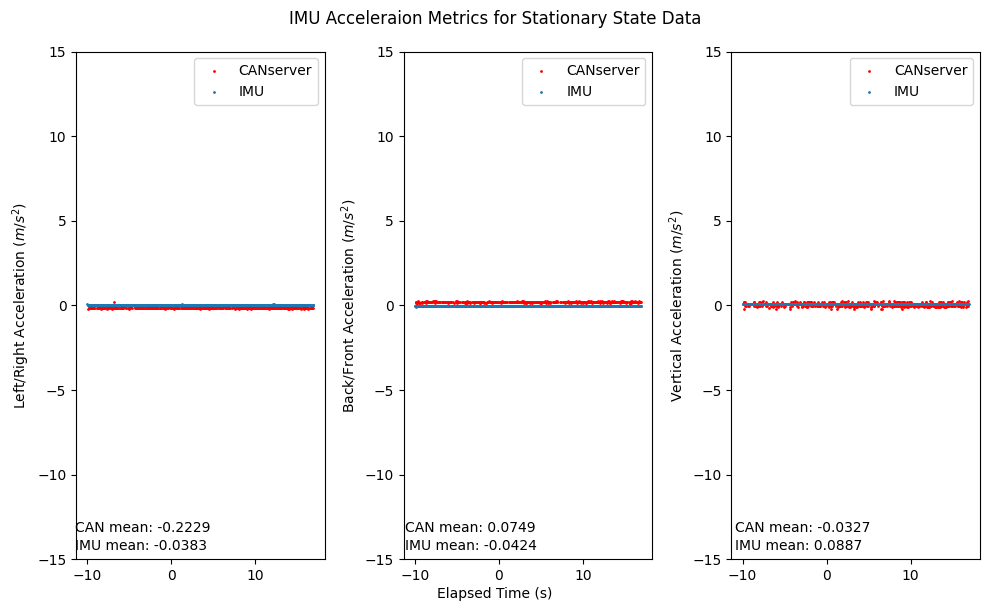

CAN time is 1685582921.102436
IMU raw time is 1685582918.2148004
Delta is 2.8876357078552246


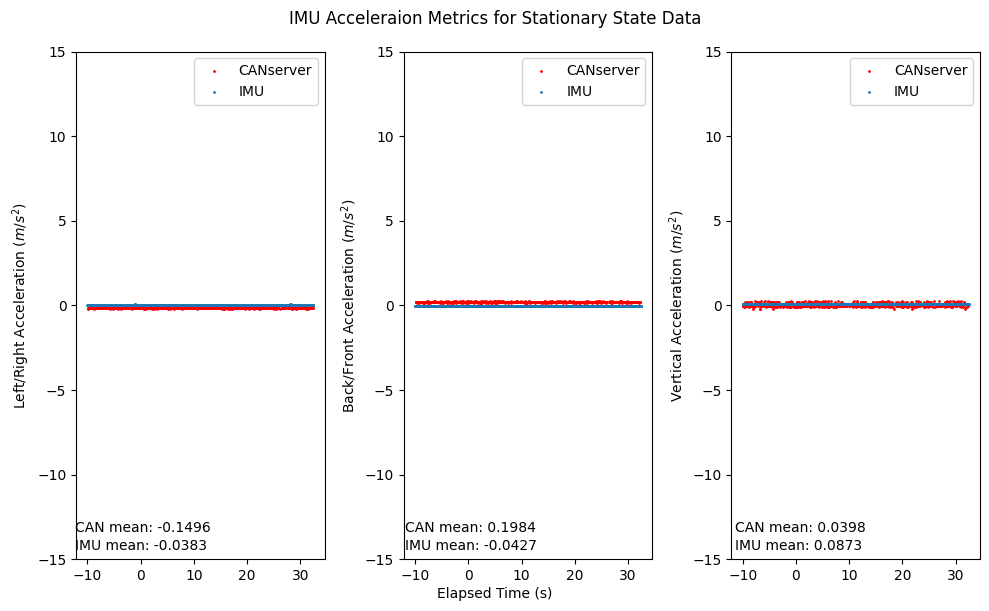

CAN time is 1685582953.544119
IMU raw time is 1685582950.6389956
Delta is 2.905123233795166


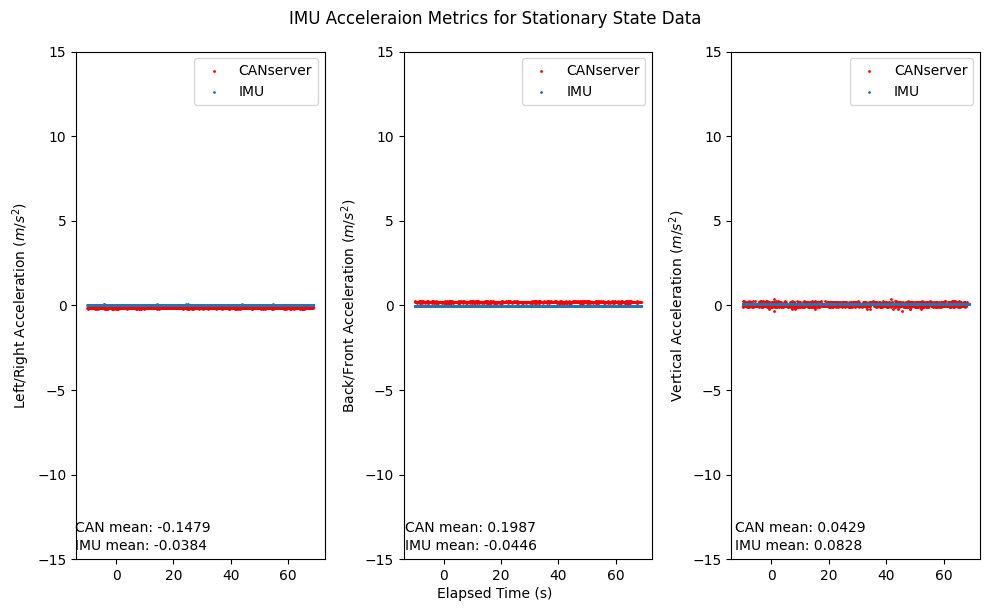

CAN time is 1685583018.71565
IMU raw time is 1685583015.8202832
Delta is 2.895366907119751


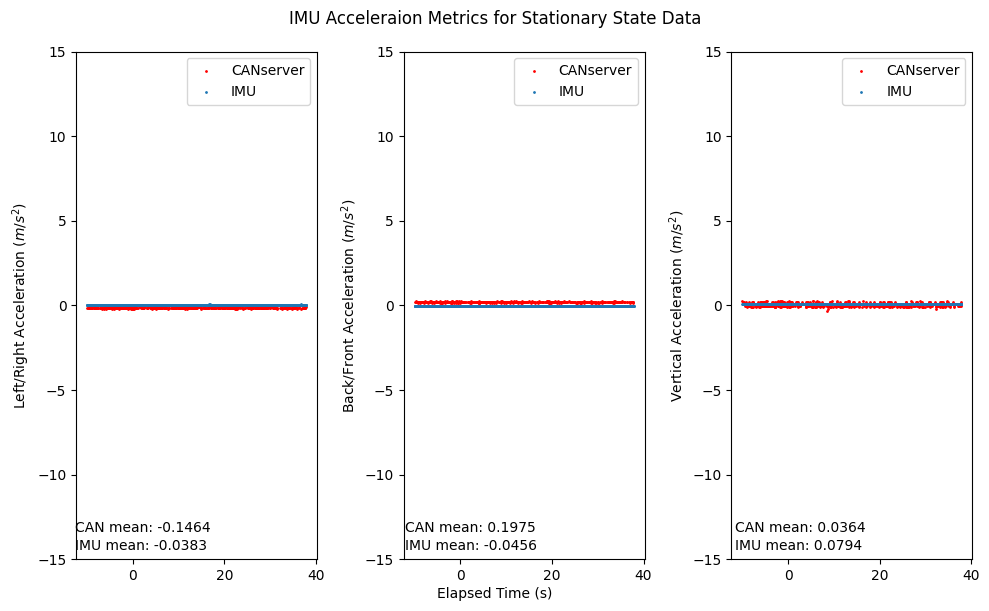

CAN time is 1685583068.093021
IMU raw time is 1685583064.8893423
Delta is 3.203678607940674


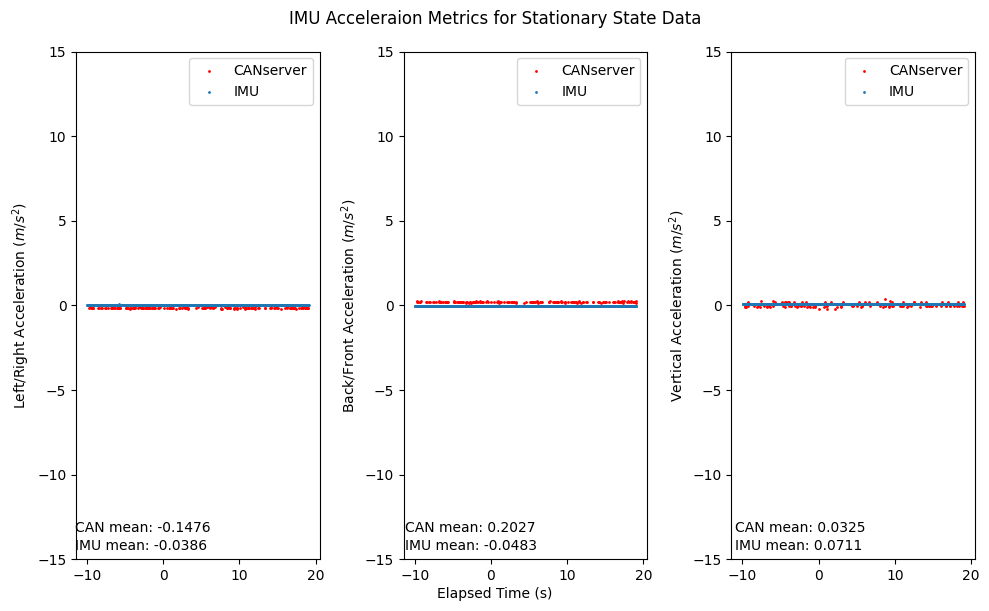

CAN time is 1685583088.494021
IMU raw time is 1685583085.5622633
Delta is 2.931757688522339


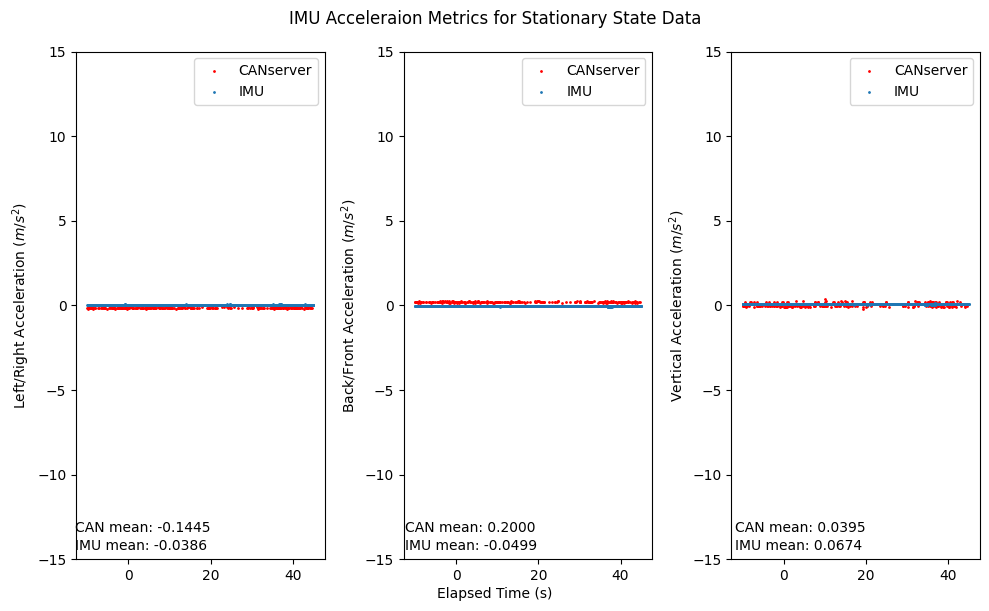

CAN time is 1685583129.788133
IMU raw time is 1685583126.8082364
Delta is 2.9798965454101562


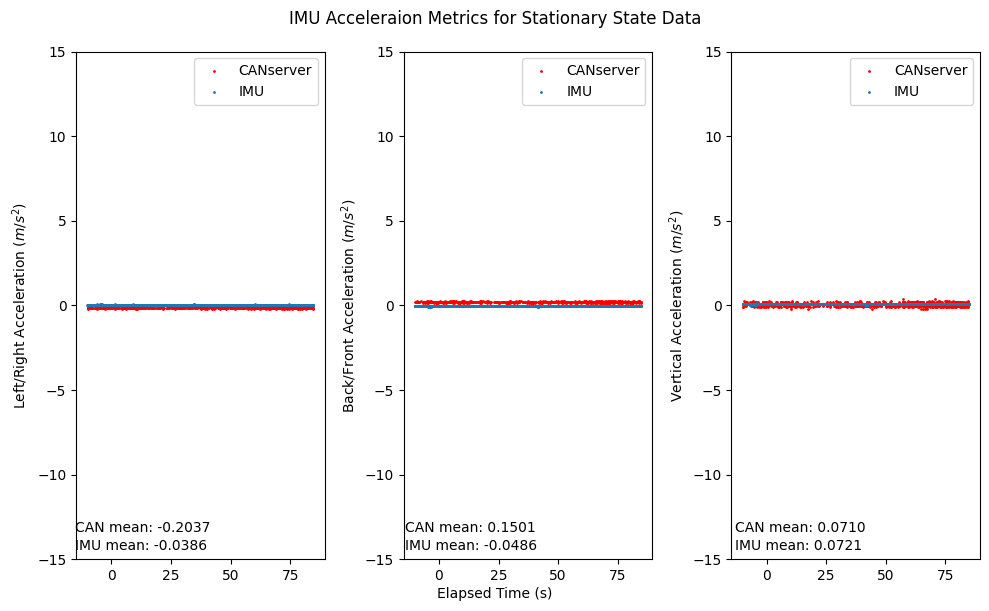

CAN time is 1685583211.74255
IMU raw time is 1685583208.8008363
Delta is 2.941713571548462


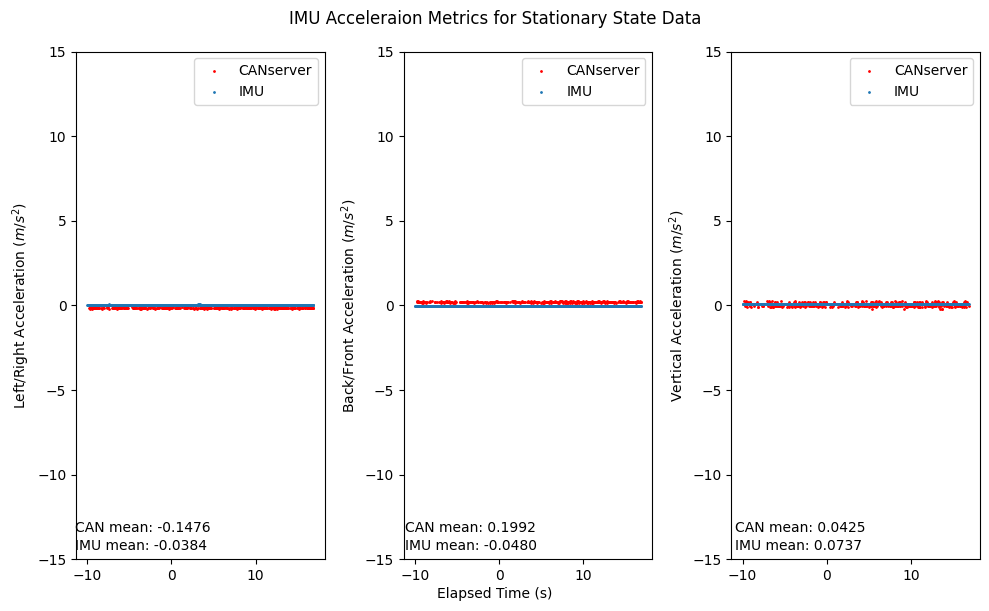

CAN time is 1685583224.66055
IMU raw time is 1685583221.6839612
Delta is 2.9765889644622803


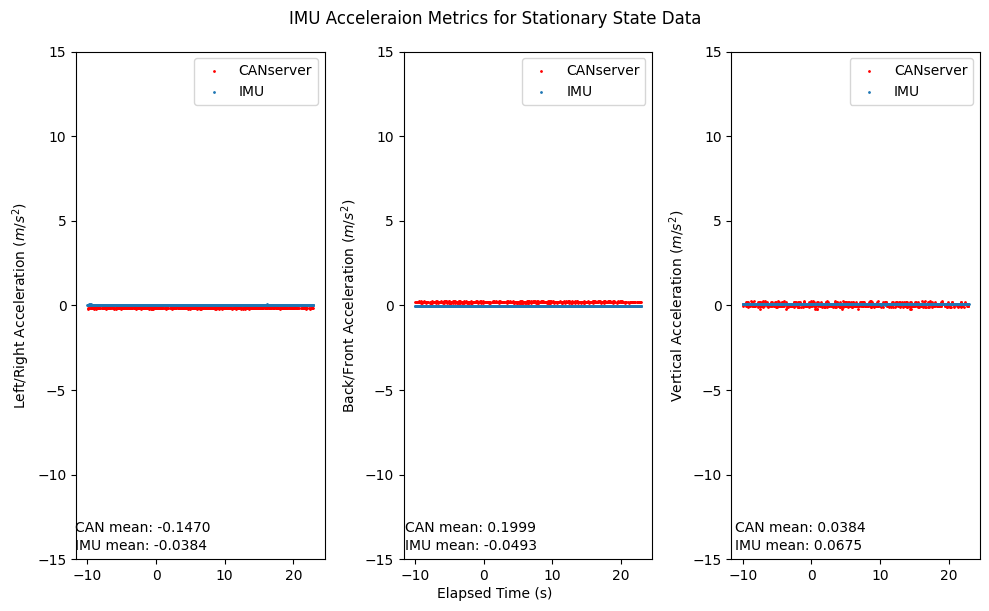

CAN time is 1685583249.709014
IMU raw time is 1685583246.784416
Delta is 2.924597978591919


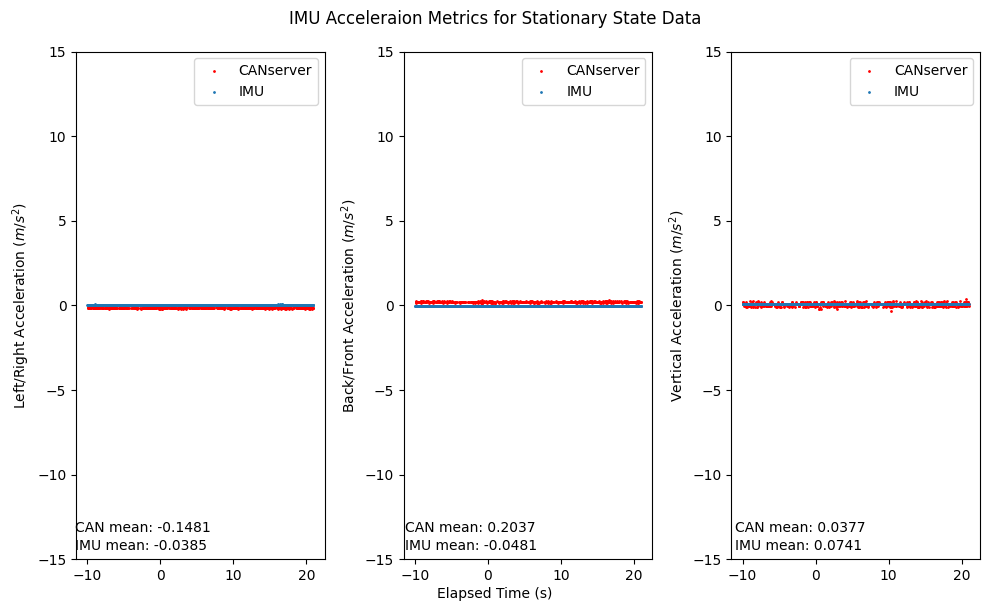

CAN time is 1685583282.592072
IMU raw time is 1685583279.6413774
Delta is 2.9506945610046387


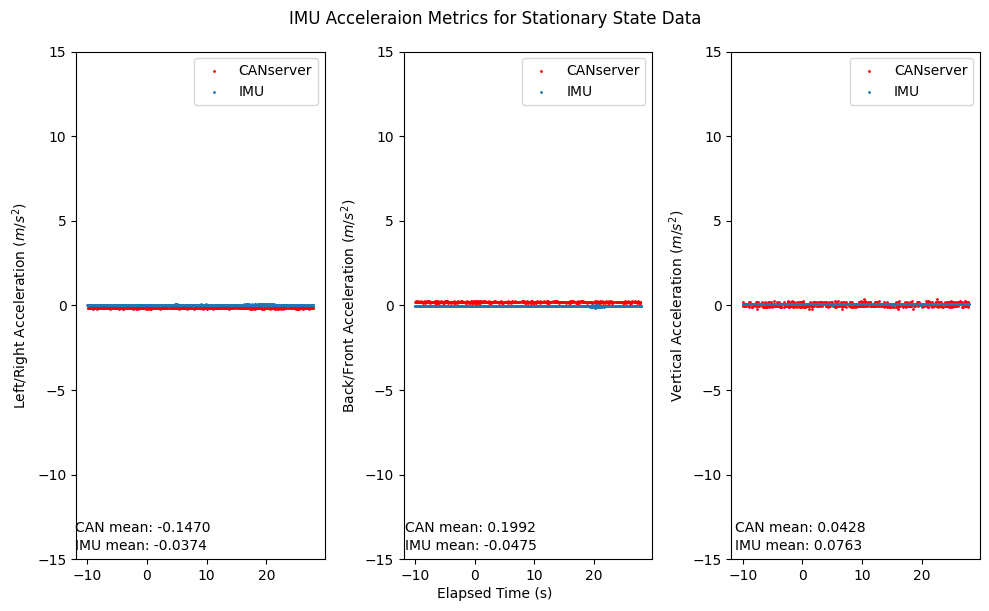

CAN time is 1685583318.888744
IMU raw time is 1685583315.9604707
Delta is 2.9282734394073486


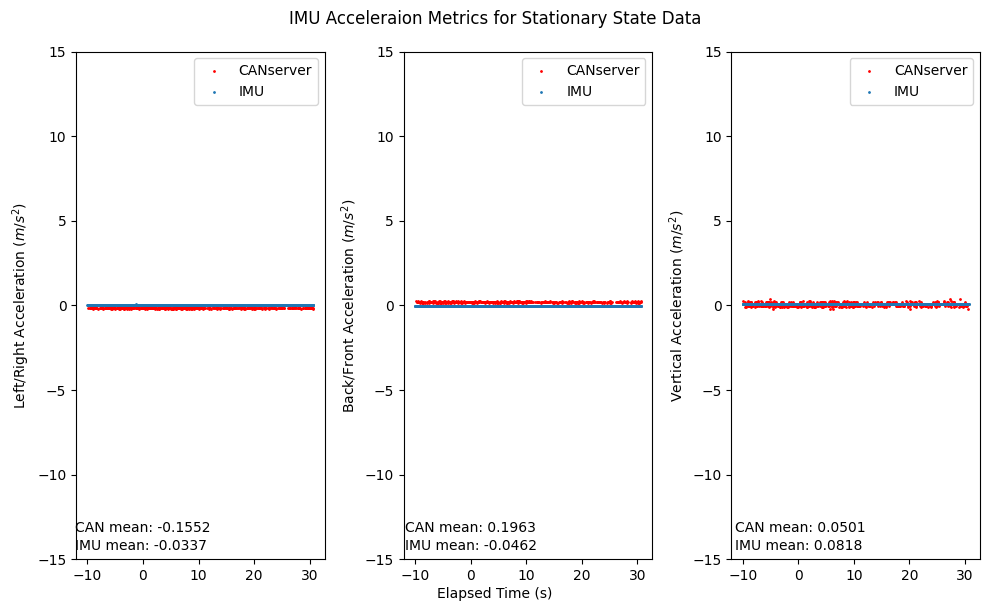

CAN time is 1685583358.638024
IMU raw time is 1685583355.6751163
Delta is 2.9629077911376953


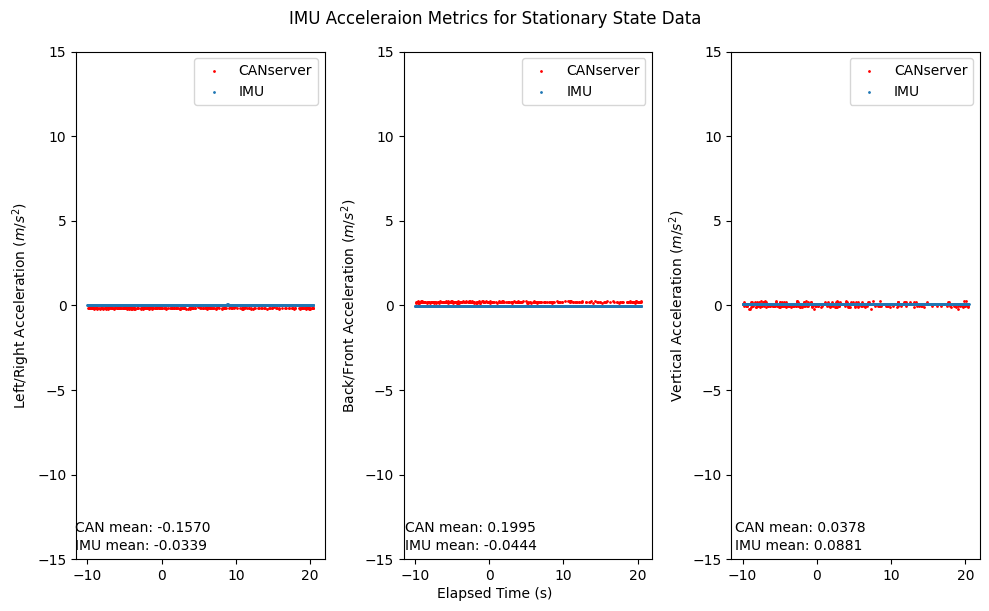

CAN time is 1685583388.407845
IMU raw time is 1685583385.4694228
Delta is 2.938422203063965


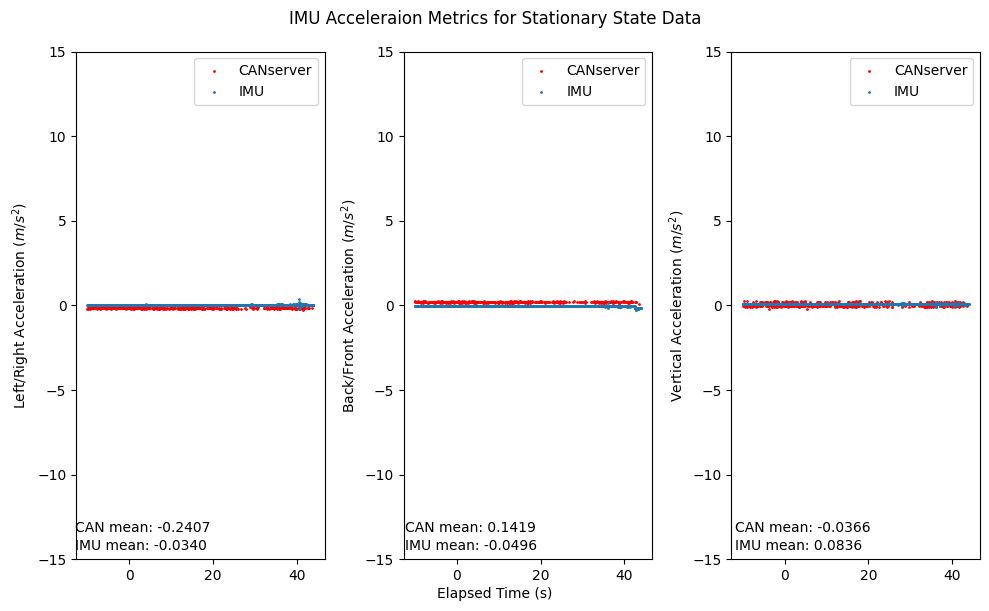

CAN time is 1685584037.740152
IMU raw time is 1685584031.057118
Delta is 6.6830339431762695


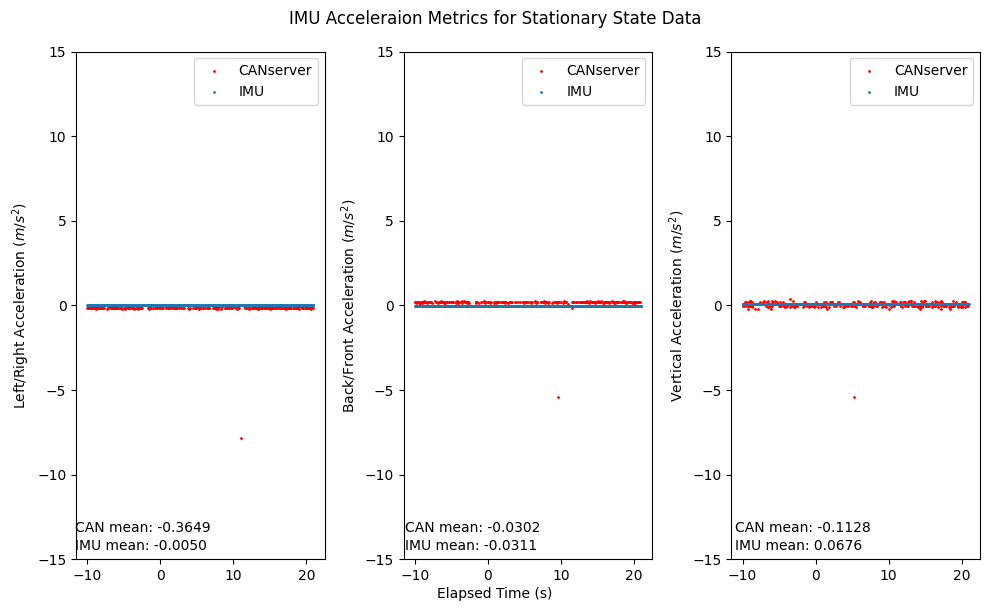

CAN time is 1685584054.807436
IMU raw time is 1685584048.0681689
Delta is 6.739267110824585


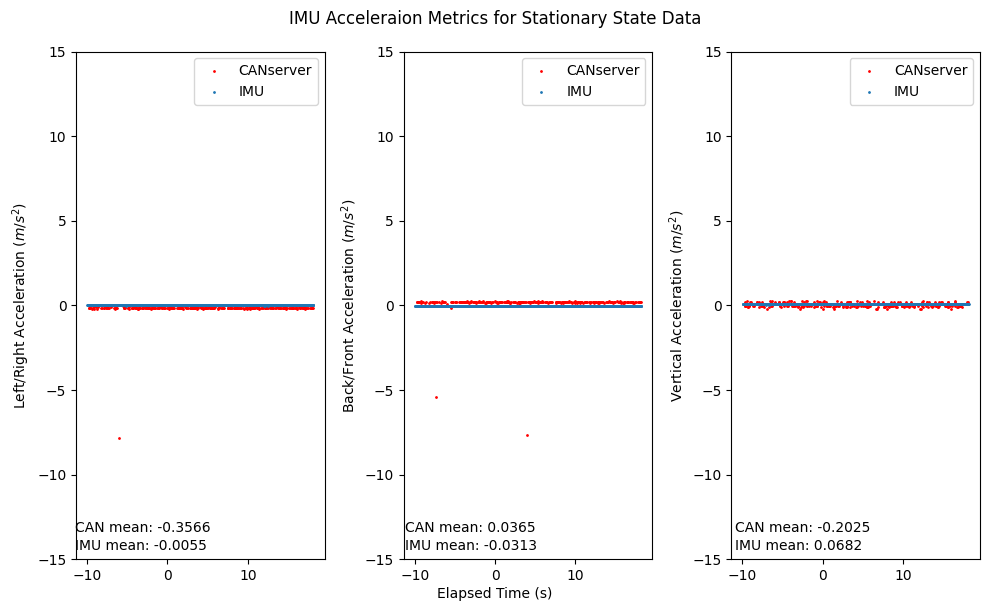

CAN time is 1685584069.206436
IMU raw time is 1685584062.4826212
Delta is 6.7238147258758545


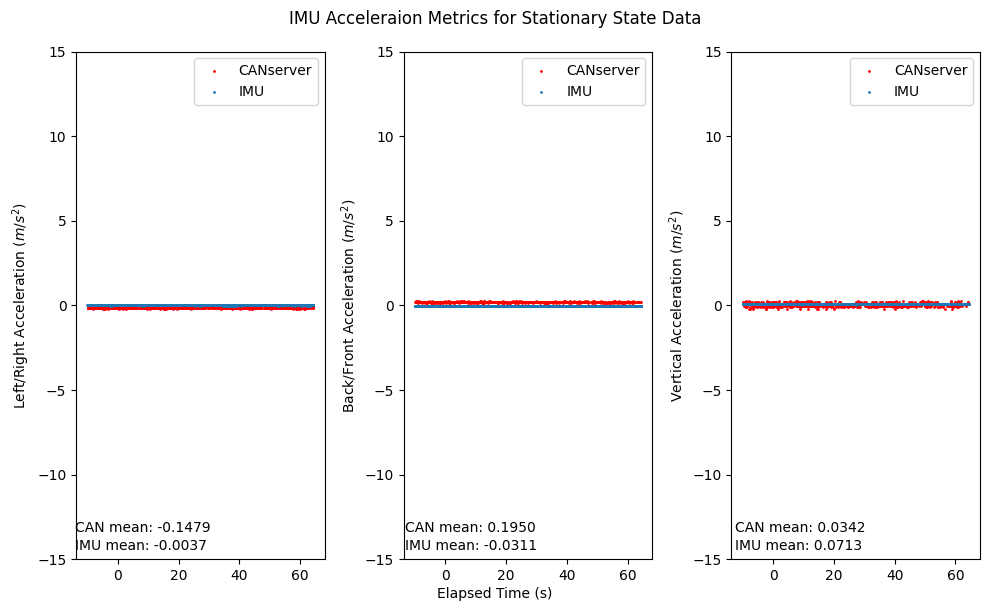

CAN time is 1685584147.340651
IMU raw time is 1685584140.4138744
Delta is 6.926776647567749


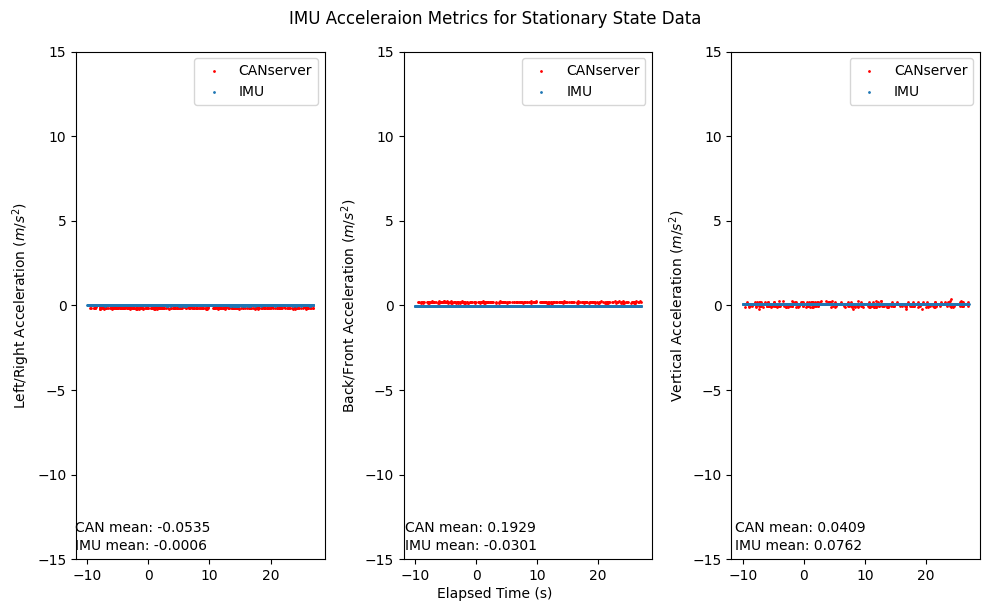

CAN time is 1685584179.906205
IMU raw time is 1685584173.004518
Delta is 6.901686906814575


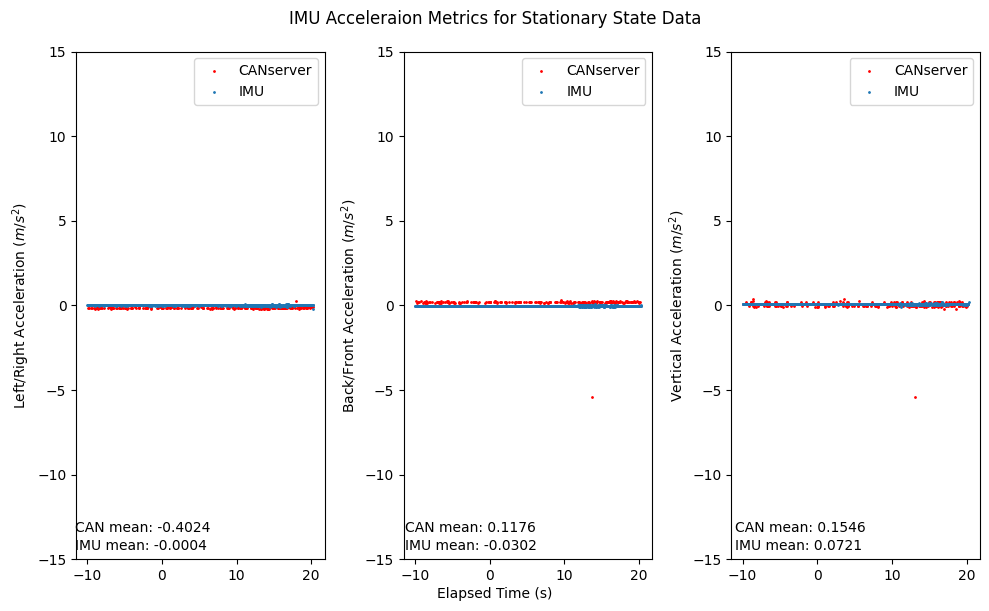

CAN time is 1685632774.22125
IMU raw time is 1685632719.9425676
Delta is 54.278682470321655


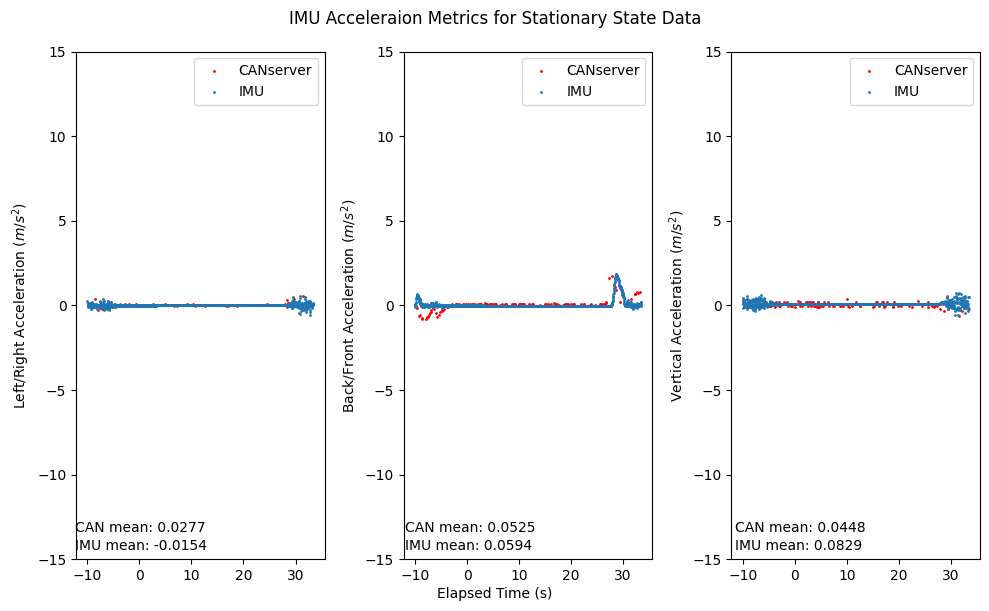

CAN time is 1685633609.354172
IMU raw time is 1685633553.2843287
Delta is 56.06984329223633


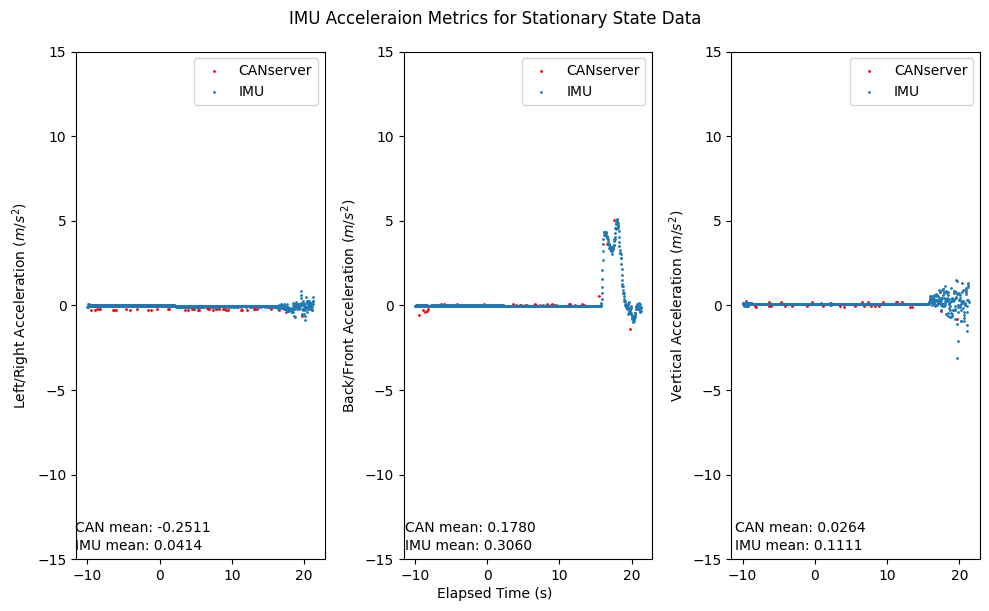

In [33]:
# plotting the IMU stationary state accelerations
edge_time = 10

for state_num in range(len(event_dict['stationary_state'])):
    ss_start_time = event_dict['stationary_state'][state_num]['start']
    ss_end_time = event_dict['stationary_state'][state_num]['end']
    ss_motion = imu_df[(imu_df['correct_timestamp'] >= ss_start_time - edge_time) 
                       & (imu_df['correct_timestamp'] <= ss_end_time + edge_time)]
    can_motion = can_df[(can_df['timestamp'] >= ss_start_time - edge_time) 
                        & (can_df['timestamp'] <= ss_end_time + edge_time)]

    if (len(ss_motion) != 0):
        print(f'CAN time is {can_motion["timestamp"].iloc[0]}')
        print(f'IMU raw time is {ss_motion["timestamp(epoch in sec)"].iloc[0]}')
        print(f'Delta is {can_motion["timestamp"].iloc[0] - ss_motion["timestamp(epoch in sec)"].iloc[0]}')
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

        fig.set_size_inches(10,6)

        lr_mean = ss_motion['lr_acc(m/s^2)'].mean()
        bf_mean = ss_motion['bf_acc(m/s^2)'].mean()
        vert_mean = ss_motion['vert_acc(m/s^2)'].mean()
        lr_can_mean = can_motion['lr_acc'].mean()
        bf_can_mean = can_motion['bf_acc'].mean()
        vert_can_mean = can_motion['vert_acc'].mean()

        ax1.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['lr_acc'], s=1, color='red', label='CANserver')
        ax1.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=-ss_motion['lr_acc(m/s^2)'], s=1, label='IMU')
        ax1.set_ylim(-15,15)

        ax2.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['bf_acc'], s=1, color='red', label='CANserver')
        ax2.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['bf_acc(m/s^2)'], s=1, label='IMU')
        ax2.set_ylim(-15,15)

        ax3.scatter(x=can_motion['timestamp'] - ss_start_time, y=can_motion['vert_acc'], s=1, color='red', label='CANserver')
        ax3.scatter(x=ss_motion['correct_timestamp'] - ss_start_time, y=ss_motion['vert_acc(m/s^2)'], s=1, label='IMU')
        ax3.set_ylim(-15,15)

        fig.suptitle("IMU Acceleraion Metrics for Stationary State Data")
        fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

        fig.text(0.08,0.08,f'IMU mean: {lr_mean:.4f}')
        fig.text(0.41,0.08,f'IMU mean: {bf_mean:.4f}')
        fig.text(0.74,0.08,f'IMU mean: {vert_mean:.4f}')
        fig.text(0.08,0.11,f'CAN mean: {lr_can_mean:.4f}')
        fig.text(0.41,0.11,f'CAN mean: {bf_can_mean:.4f}')
        fig.text(0.74,0.11,f'CAN mean: {vert_can_mean:.4f}')

        ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
        ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
        ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

        ax1.legend()
        ax2.legend()
        ax3.legend()
        plt.tight_layout()
        plt.show()

In [34]:
# stitching together all stationary state data
imu_ss_states = []
can_ss_states = []
for state_num in range(len(event_dict['stationary_state'])):
    ss_start_time = event_dict['stationary_state'][state_num]['start']
    ss_end_time = event_dict['stationary_state'][state_num]['end']
    imu_ss_states.append(imu_df[(imu_df['correct_timestamp'] >= ss_start_time) 
                       & (imu_df['correct_timestamp'] <= ss_end_time)])
    can_ss_states.append(can_df[(can_df['timestamp'] >= ss_start_time) 
                        & (can_df['timestamp'] <= ss_end_time)])
imu_ss_df = pd.concat(imu_ss_states, ignore_index=True)
can_ss_df = pd.concat(can_ss_states, ignore_index=True)

# 21834
# 19230
print(can_ss_df['speed'].max())
print(len(imu_ss_df))
print(len(can_ss_df))
print('left/right acceleration:')
print(f'imu mean: {imu_ss_df["lr_acc(m/s^2)"].mean()}')
print(f'imu max: {imu_ss_df["lr_acc(m/s^2)"].max()}')
print(f'imu min: {imu_ss_df["lr_acc(m/s^2)"].min()}')
print(f'can mean: {can_ss_df["lr_acc"].mean()}')
print(f'can max: {can_ss_df["lr_acc"].max()}')
print(f'can min: {can_ss_df["lr_acc"].min()}')
print('')
print('back/from acceleration:')
print(f'imu mean: {imu_ss_df["bf_acc(m/s^2)"].mean()}')
print(f'imu max: {imu_ss_df["bf_acc(m/s^2)"].max()}')
print(f'imu min: {imu_ss_df["bf_acc(m/s^2)"].min()}')
print(f'can mean: {can_ss_df["bf_acc"].mean()}')
print(f'can max: {can_ss_df["bf_acc"].max()}')
print(f'can min: {can_ss_df["bf_acc"].min()}')
print('')
print('vertical acceleration:')
print(f'imu mean: {imu_ss_df["vert_acc(m/s^2)"].mean()}')
print(f'imu max: {imu_ss_df["vert_acc(m/s^2)"].max()}')
print(f'imu min: {imu_ss_df["vert_acc(m/s^2)"].min()}')
print(f'can mean: {can_ss_df["vert_acc"].mean()}')
print(f'can max: {can_ss_df["vert_acc"].max()}')
print(f'can min: {can_ss_df["vert_acc"].min()}')
print('')
print('normalized acceleration:')
imu_norm = np.sqrt(imu_ss_df['lr_acc(m/s^2)']**2 + imu_ss_df['bf_acc(m/s^2)']**2 + imu_ss_df['vert_acc(m/s^2)']**2)
can_norm = np.sqrt(can_ss_df['lr_acc']**2 + can_ss_df['bf_acc']**2 + can_ss_df['vert_acc']**2)
print(f'imu mean: {imu_norm.mean()}')
print(f'imu max: {imu_norm.max()}')
print(f'imu min: {imu_norm.min()}')
print(f'can mean: {can_norm.mean()}')
print(f'can max: {can_norm.max()}')
print(f'can min: {can_norm.min()}')

0.0
21834
19230
left/right acceleration:
imu mean: -0.023272049770829906
imu max: 0.09195341635711363
imu min: -0.09634157498699247
can mean: -0.13025282072712077
can max: 38.07875
can min: -40.96

back/from acceleration:
imu mean: -0.015539855824791145
imu max: 0.4126186996096122
imu min: -0.0692138744975418
can mean: 0.118547325532804
can max: 28.15875
can min: -34.917500000000004

vertical acceleration:
imu mean: 0.07832407319873558
imu max: 0.1684999366742943
imu min: -0.004351718827281913
can mean: 0.03698896085805823
can max: 40.31875
can min: -34.24

normalized acceleration:
imu mean: 0.10113203470457575
imu max: 0.43214219240825
imu min: 0.027077519800206836
can mean: 0.4045103105487794
can max: 59.946260999435985
can min: 0.040869456810679536


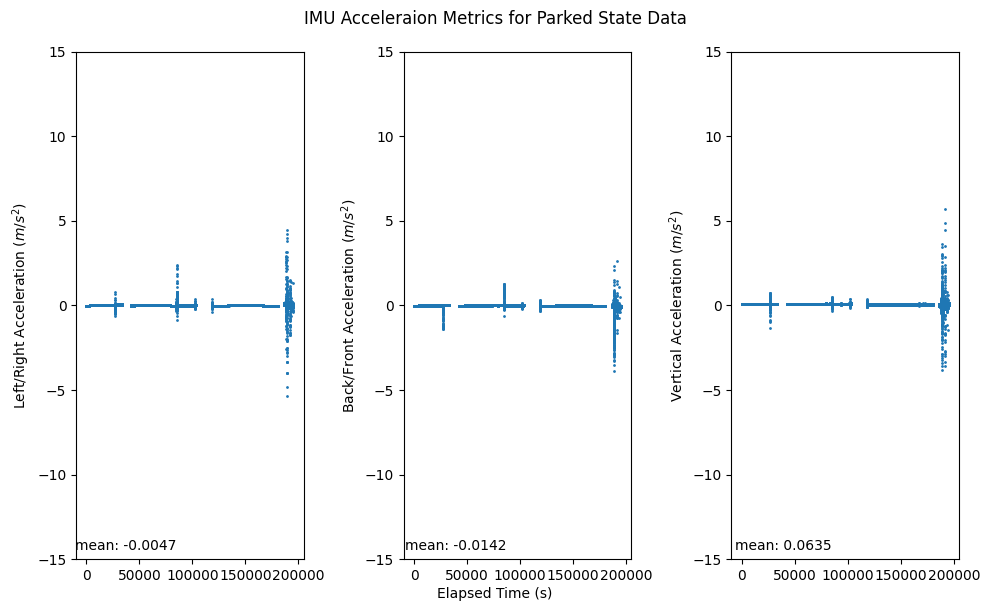

Vertical acceleration:
max: 5.718138232576142
min: -3.834164649365028


In [5]:
# plot the imu parked state data stitched together

pk_states = []
for state_num in range(len(event_dict['parked_state'])):
    pk_start_time = event_dict['parked_state'][state_num]['timestamp'][0]
    pk_end_time = event_dict['parked_state'][state_num]['timestamp'][1]
    pk_states.append(imu_df[(imu_df['timestamp(epoch in sec)'] >= pk_start_time) 
                            & (imu_df['timestamp(epoch in sec)'] <= pk_end_time)])
pk_motion = pd.concat(pk_states, ignore_index=True)
pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
# pk_motion = pk_motion[pk_motion['timestamp(epoch in sec)'] <= pk_start_time + 5000]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

fig.set_size_inches(10,6)

lr_mean = pk_motion['lr_acc(m/s^2)'].mean()
bf_mean = pk_motion['bf_acc(m/s^2)'].mean()
vert_mean = pk_motion['vert_acc(m/s^2)'].mean()
lr_max = pk_motion['lr_acc(m/s^2)'].max()
bf_max = pk_motion['bf_acc(m/s^2)'].max()
vert_max = pk_motion['vert_acc(m/s^2)'].max()
lr_min = pk_motion['lr_acc(m/s^2)'].min()
bf_min = pk_motion['bf_acc(m/s^2)'].min()
vert_min = pk_motion['vert_acc(m/s^2)'].min()

pk_start_time = event_dict['parked_state'][0]['timestamp'][0]
ax1.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['lr_acc(m/s^2)'], s=1, label='IMU')
ax1.set_ylim(-15,15)

ax2.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['bf_acc(m/s^2)'], s=1, label='IMU')
ax2.set_ylim(-15,15)

ax3.scatter(x=pk_motion['timestamp(epoch in sec)'] - pk_start_time, y=pk_motion['vert_acc(m/s^2)'], s=1, label='IMU')
ax3.set_ylim(-15,15)

fig.text(0.08,0.08,f'mean: {lr_mean:.4f}')
fig.text(0.41,0.08,f'mean: {bf_mean:.4f}')
fig.text(0.74,0.08,f'mean: {vert_mean:.4f}')

fig.suptitle("IMU Acceleraion Metrics for Parked State Data")
fig.text(0.5, 0.0, 'Elapsed Time (s)', ha='center')

ax1.set_ylabel("Left/Right Acceleration ($m/s^2$)")
ax2.set_ylabel("Back/Front Acceleration ($m/s^2$)")
ax3.set_ylabel("Vertical Acceleration ($m/s^2$)")

plt.tight_layout()
plt.show()

print('Vertical acceleration:')
print(f'max: {vert_max}')
print(f'min: {vert_min}')